In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [25]:
dataset = pd.read_csv('marketing_data.csv')

In [26]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


# Descripción de las variables

In [23]:
dataset.shape

(2233, 29)

In [27]:
# verifico si el dataset tiene datos faltantes y los tipos de datos que tiene el dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2233 non-null   int64  
 1   Year_Birth           2233 non-null   int64  
 2   Education            2233 non-null   object 
 3   Marital_Status       2233 non-null   object 
 4   Income               2209 non-null   float64
 5   Kidhome              2233 non-null   int64  
 6   Teenhome             2233 non-null   int64  
 7   Dt_Customer          2233 non-null   object 
 8   Recency              2233 non-null   int64  
 9   MntWines             2233 non-null   int64  
 10  MntFruits            2233 non-null   int64  
 11  MntMeatProducts      2233 non-null   int64  
 12  MntFishProducts      2233 non-null   int64  
 13  MntSweetProducts     2233 non-null   int64  
 14  MntGoldProds         2233 non-null   int64  
 15  NumDealsPurchases    2233 non-null   i

In [28]:
# remplazo los valores faltantes por el promedio para hacer un mejor analisis
promedio = dataset['Income'].mean()
dataset['Income'] = dataset['Income'].replace(np.nan, promedio) 

In [29]:
pd.options.display.float_format = '{:,.1f}'.format # elimino los decimales sobrantes del dataset

In [30]:
dataset.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,"58,138.0",0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,"46,344.0",1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,"71,613.0",0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,"26,646.0",1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,"58,293.0",1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


# Comienzo analizando la columna 'Year_Birth' --> año de nacimiento del cliente

se puede analizar como estan distribuidas las edades de los clientes

In [31]:
# importo las librerias para graficar datos

import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# con la columna de Year_Birth calculo las edades de los clientes

<AxesSubplot:xlabel='Year_Birth', ylabel='count'>

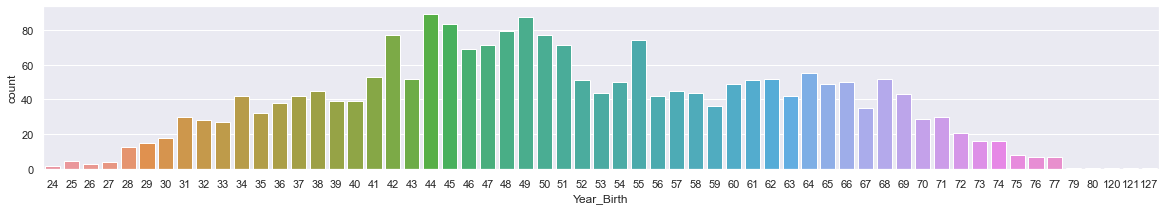

In [33]:
sns.set(rc={'figure.figsize':(20,3)})
sns.countplot(dataset['Year_Birth'].apply(lambda x:2020 - x))

el rango de las edades de las personas que compran estan desde los 24 años hasta los 77 años, pero hay mas frecuencia con los clientes entre los 41 a 51 años de edad.

# Exploro el estado civil de los clientes

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

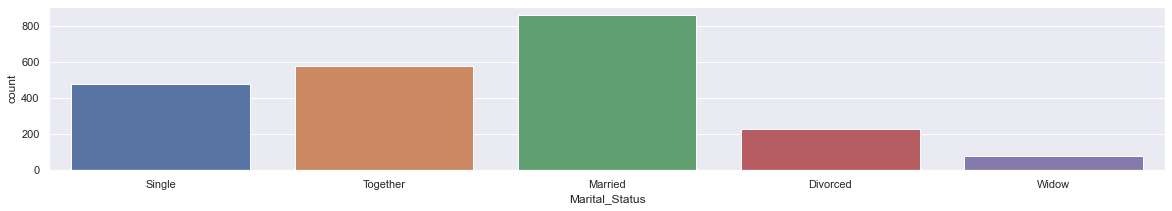

In [34]:
sns.set(rc={'figure.figsize':(20,3)})
sns.countplot(dataset['Marital_Status'])

la mayoria de los clientes son casados, unidos y solteros.

# Exploro como esta distribuida la educación academica de los clientes

<AxesSubplot:xlabel='count', ylabel='Education'>

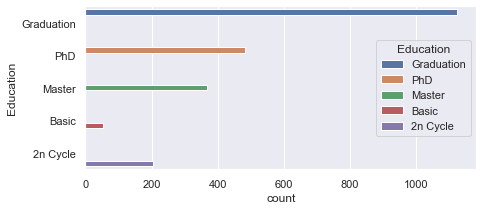

In [35]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y='Education', data=dataset, hue = 'Education')

hay muy pocos clientes con educacion basica y segundo ciclo ya que la edad de los clientes en el dataset es a partir de los 24 años de edad

# Veamos como estan los ingresos de los clientes según su estado civil y nivel academico

In [36]:
pd.DataFrame(dataset['Income'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Income,"2,233.0","52,244.0","25,062.6","1,730.0","35,523.0","51,766.0","68,316.0","666,666.0"


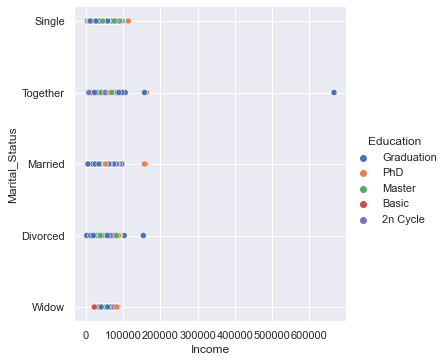

In [37]:
sns.relplot(x='Income', y="Marital_Status",hue = 'Education', data=dataset);

el nivel academico de los clientes esta dispersos en todos los estados civiles de los clientes, en la grafica veo que hay mucha presencia de personas con master y son solteros, tambien veo gran cantidad de clientes con graduación que estan casados, con los divorciados hay mas presencia de graduados que con master lo mismo pasa con los clientes que estan unidos con alguien mas y finalmente muy pocas personas con educacion basica.

ahora el rango de ingresos es muy similar con los solteros, unidos, casados y divorciados pero en estos tres ultimos
hay clientes que tienen ingresos por fuera del rango de los demas.

# Voy a explorar quienes tienen los ingresos mas altos entre los solteros, unidos, casados y divorciados

In [38]:
single = dataset[(dataset['Marital_Status'] =='Single')] # solteros
together = dataset[(dataset['Marital_Status'] =='Together')] # unidos
married = dataset[(dataset['Marital_Status'] =='Married')] # casados
divorced = dataset[(dataset['Marital_Status'] =='Divorced')] # divorciados
widow = dataset[(dataset['Marital_Status'] =='Widow')] # viudos

In [39]:
print('solteros')
print(pd.DataFrame(single['Income'].describe()).T)
print('unidos')
print(pd.DataFrame(together['Income'].describe()).T)
print('casados')
print(pd.DataFrame(married['Income'].describe()).T)
print('divorciados')
print(pd.DataFrame(divorced['Income'].describe()).T)
print('viudos')
print(pd.DataFrame(widow['Income'].describe()).T)

solteros
        count     mean      std     min      25%      50%      75%       max
Income  480.0 51,018.8 22,020.4 3,502.0 33,919.2 49,277.5 68,634.0 113,734.0
unidos
        count     mean      std     min      25%      50%      75%       max
Income  580.0 53,233.4 33,440.3 5,648.0 34,973.2 52,137.0 68,407.5 666,666.0
casados
        count     mean      std     min      25%      50%      75%       max
Income  864.0 51,729.2 21,362.3 2,447.0 35,611.5 52,244.0 67,488.0 160,803.0
divorciados
        count     mean      std     min      25%      50%      75%       max
Income  232.0 52,834.2 21,239.8 1,730.0 36,948.0 52,683.0 68,758.5 153,924.0
viudos
        count     mean      std      min      25%      50%      75%      max
Income   77.0 56,426.5 16,733.8 22,123.0 45,006.0 56,551.0 70,165.0 85,620.0


en el dataset la mayoria son clientes divorciados, analizando los estadisticos son muy parecidos los promedios son muy similares, la desviación estadar con los casados indica que los ingresos de los casados son mas dispersos (varian mucho), los percentiles tambien son muy parecidos por ultimo comparando los minimos y los maximos tiene mejores numeros los casados.

# Continuo con la columna 'Kidhome' numero de niños en el hogar del cliente y analizo como esta con el estado civil del cliente

In [40]:
dataset['Kidhome'].unique()

array([0, 1, 2])

hay clientes que sin niños en el hogar, otros con 1 solo niño y 2 niños nada mas

In [41]:
# creo datasets para graficar como estan distribuidos los niños en el hogar correlacionado con el estado civil del cliente
cero = dataset[(dataset['Kidhome'])== 0]
uno = dataset[(dataset['Kidhome'])== 1]
dos = dataset[(dataset['Kidhome'])== 2]

<AxesSubplot:xlabel='Marital_Status'>

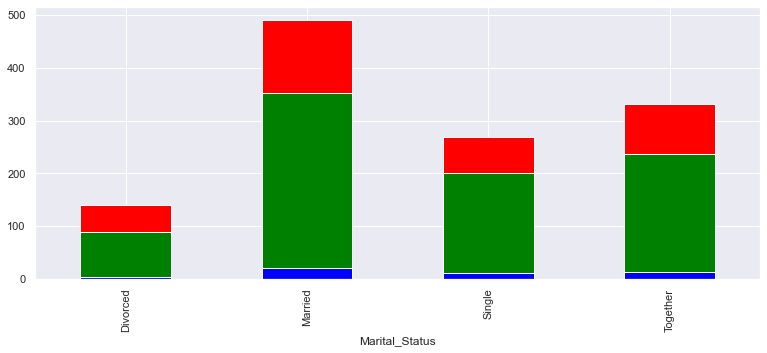

In [42]:
# grafico los datos
cero.groupby('Marital_Status')['Kidhome'].count().plot(kind='bar',label='0',figsize=(13,5),color='red')
uno.groupby('Marital_Status')['Kidhome'].count().plot(kind='bar',label='0',figsize=(13,5), color='green')
dos.groupby('Marital_Status')['Kidhome'].count().plot(kind='bar',label='0',figsize=(13,5), color='blue')

# --> 0 niños en el hogar = rojo
# --> 1 niños en el hogar  = verde
# --> 2 niños en el hogar = azul

los clientes casados y unidos son los clientes que mas tienen niños, pero estas personas la gran mayoria solo tienen un niño en el hogar o no tienen niños, muy poquita gente tienen 2 niños en el hogar.

# Veamos lo mismo pero con el nivel academico

In [43]:
# --> 0 niños en el hogar = rojo
# --> 1 niños en el hogar  = verde
# --> 2 niños en el hogar = azul

<AxesSubplot:xlabel='Education'>

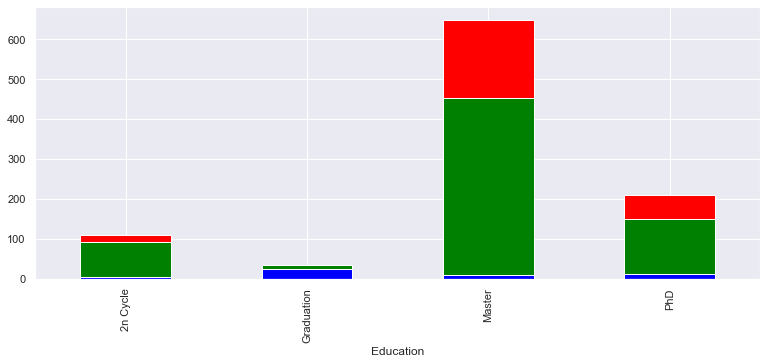

In [44]:
cero.groupby('Education')['Kidhome'].count().plot(kind='bar',label='0',figsize=(13,5),color='red')
uno.groupby('Education')['Kidhome'].count().plot(kind='bar',label='0',figsize=(13,5), color='green')
dos.groupby('Education')['Kidhome'].count().plot(kind='bar',label='0',figsize=(13,5), color='blue')

clientes con master y doctorado prefieren tener 0 o 1 niño en la casa, en cambio los graduados las mayoria tiene 2 niños en la casa y los del segundo ciclo prefiren 1 niño en la casa.

# Tambien exploro como estan distribuidos el numero de adolescentes en el hogar del cliente

In [45]:
# --> 0 adolescentes en el hogar = rojo
# --> 1 adolescentes en el hogar  = verde
# --> 2 adolescentes en el hogar = azul

<AxesSubplot:xlabel='Marital_Status'>

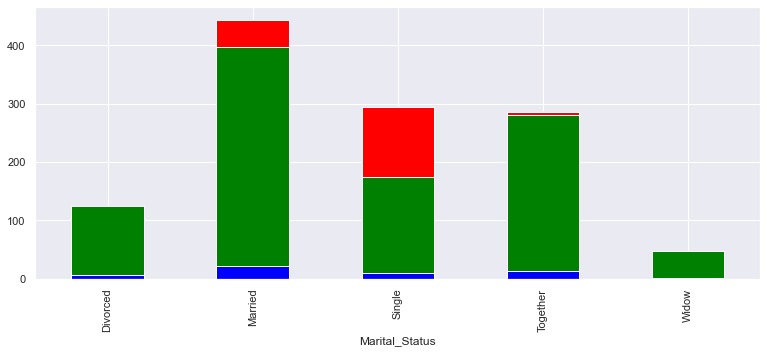

In [46]:
cero = dataset[(dataset['Teenhome'])== 0]
uno = dataset[(dataset['Teenhome'])== 1]
dos = dataset[(dataset['Teenhome'])== 2]

cero.groupby('Marital_Status')['Teenhome'].count().plot(kind='bar',label='0',figsize=(13,5),color='red')
uno.groupby('Marital_Status')['Teenhome'].count().plot(kind='bar',label='0',figsize=(13,5), color='green')
dos.groupby('Marital_Status')['Teenhome'].count().plot(kind='bar',label='0',figsize=(13,5), color='blue')

In [47]:
# --> 0 adolescentes en el hogar = rojo
# --> 1 adolescentes en el hogar  = verde
# --> 2 adolescentes en el hogar = azul

<AxesSubplot:xlabel='Education'>

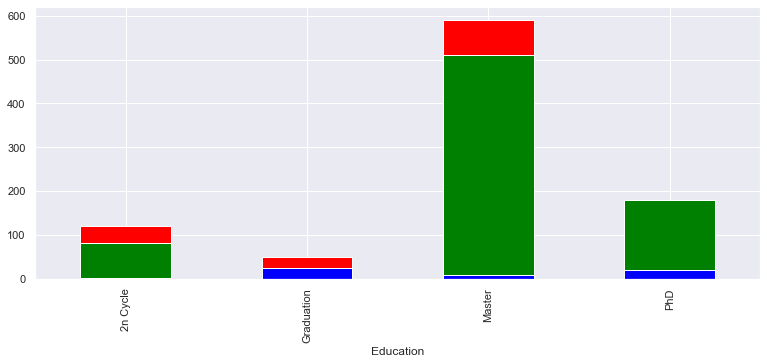

In [48]:
cero.groupby('Education')['Teenhome'].count().plot(kind='bar',label='0',figsize=(13,5),color='red')
uno.groupby('Education')['Teenhome'].count().plot(kind='bar',label='0',figsize=(13,5), color='green')
dos.groupby('Education')['Teenhome'].count().plot(kind='bar',label='0',figsize=(13,5), color='blue')

clientes casados y con master son las personas con mas presencia de adolescentes en el hogar, los graduados no tienen adolescentes en el hogar tal vez por que son personas jovenes, tambien hay adolescentes con los clientes con doctorado tal vez por que son personas mas mayores. 

# Ahora quiero ver las fechas de inscripción del los clientes en la empresa 'Dt_Customer'

In [49]:
# primero cambio el tipo de dato de la columna Dt_Customer a datetime
dataset['Dt_Customer']= pd.to_datetime(
    dataset['Dt_Customer'],
    errors = 'coerce',
    format ='%Y/%m/%d'
)

In [50]:
# creo una variable con las fechas del dataset
dates = dataset['Dt_Customer']

In [51]:
# creo tres listas para lamacenar los años, los meses y los dias

years = []
months = []
days = []
c = 0
for i in dates:
    years.append(i.year)
    months.append(i.month)
    days.append(i.day)

In [52]:
# creo un dataset aparte exclusivamente con las fechas de inscripción del cliente para analizar las fechas
customer_dates = {
    'year' : years,
    'month' : months,
    'day' : days
}

customer_dates = pd.DataFrame(customer_dates)
customer_dates.shape

(2233, 3)

<AxesSubplot:xlabel='year', ylabel='count'>

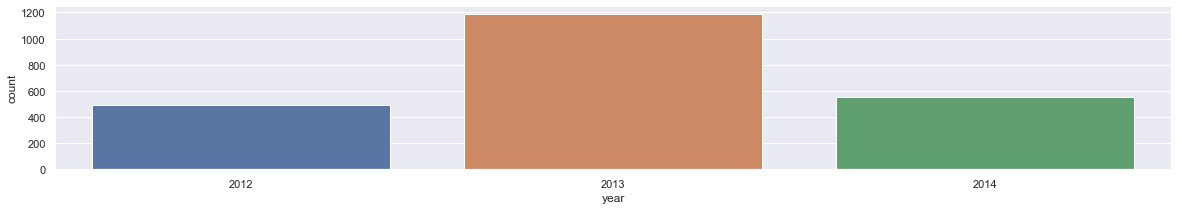

In [53]:
sns.set(rc={'figure.figsize':(20,3)})
sns.countplot(customer_dates['year'])

en el 2013 fue el año donde mas se inscribieron clientes a la empresa

# Ahora quiero explorar como estuvieron las inscripciónes por año

Inicio con el año 2012

total inscripciones  (491, 3)


<AxesSubplot:xlabel='month', ylabel='count'>

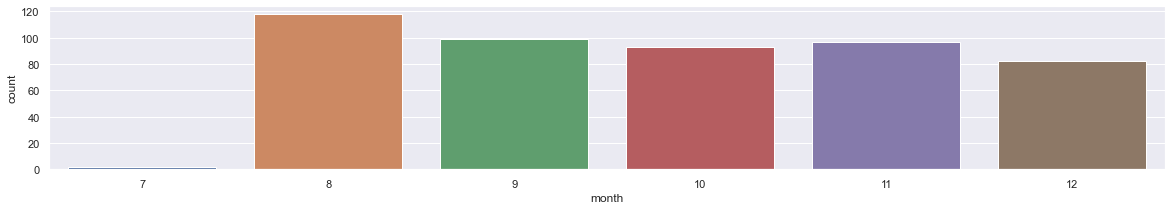

In [54]:
# tomo solo las fechas del año 2012
year_2012= customer_dates[(customer_dates['year']==2012)]
print('total inscripciones ',year_2012.shape)
sns.countplot(year_2012['month'])

en el año 2012 en apartir del mes de agosto fue donde se inscribieron los clientes a a empresa

total inscripciones  (1188, 3)


<AxesSubplot:xlabel='month', ylabel='count'>

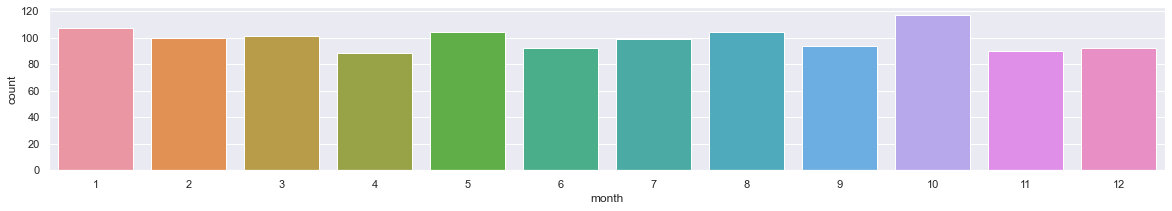

In [55]:
# ahora tomo solo las fechas del año 2013
year_2013= customer_dates[(customer_dates['year']==2013)]
print('total inscripciones ',year_2013.shape)
sns.countplot(year_2013['month'])

a lo largo de todo el año se inscribieron clientes a la empresa casi que similar en todos los meses

total inscripciones  (554, 3)


<AxesSubplot:xlabel='month', ylabel='count'>

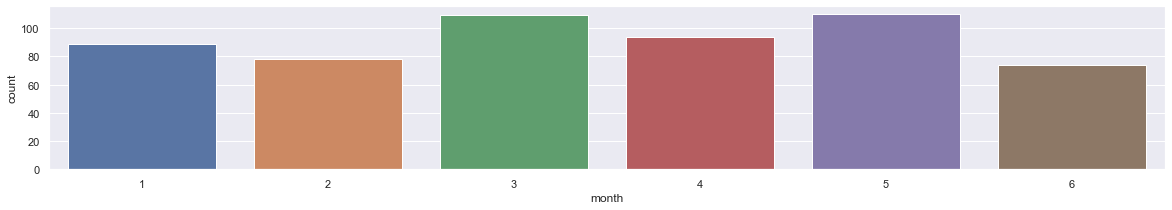

In [56]:
# y por ultimo tomo solo las fechas del año 2013
year_2014= customer_dates[(customer_dates['year']==2014)]
print('total inscripciones ',year_2014.shape)
sns.countplot(year_2014['month'])

en el año 214 hasta el mes de junio se inscribieron clientes a la empresa

# Continuo con la siguiente columna que es 'Recency' --> número de días desde la última compra del cliente

In [57]:
# antes ordeno los datos de la columna de menor a mayor

dataset = dataset.sort_values(by=['Recency'],ascending=[True])
dataset['Recency'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

ya que el rango de los dias va desde el 0 hasta el 99 voy a dividir la columna 'Recency' en 4 partes de manera ordenada

In [58]:
frecuents = [i for i in dataset['Recency'] if i <= 24] # clientes frecuentes de 0 a 24 dias
frecuents_2 = [i for i in dataset['Recency'] if i >= 25 and i <=49] # clientes no tan frecuentes de 25 a 49 dias
frecuents_3 = [i for i in dataset['Recency'] if i >= 50 and i <=74] # clientes no frecuentes de 50 a 74 dia
frecuents_4 = [i for i in dataset['Recency'] if i >= 75 and i <=99] # clientes no frecuentes de 75 a 99 dias

print(len(frecuents))
print(len(frecuents_2))
print(len(frecuents_3))
print(len(frecuents_4))

564
552
566
551


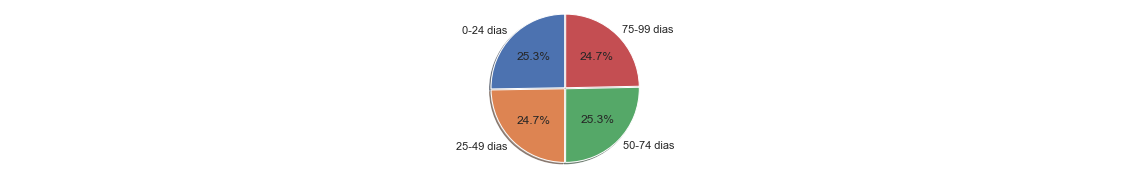

In [59]:
labels = ['0-24 dias','25-49 dias','50-74 dias','75-99 dias']
sizes = [len(frecuents), len(frecuents_2), len(frecuents_3), len(frecuents_4)]
explode = (0.01, 0.01, 0.01, 0.01)  

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

se dividieron las frecuencias de los clientes en 4 partes iguales, yo considero que los clientes frecuentes son los que compran maximo 24 dias despues de la ultima compra. solo el 25.3 % compran en el rango de 0 a 24 dias este numero deberia mejorar.

# Complain --> 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario

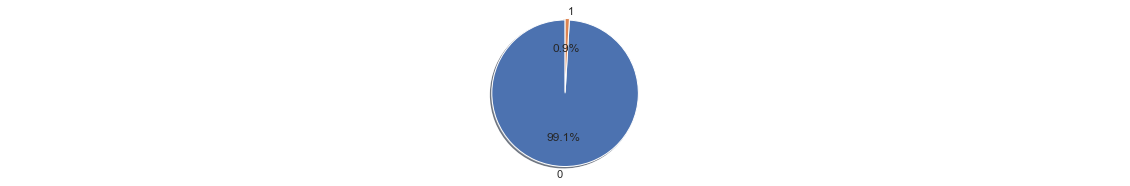

In [60]:
labels = dataset['Complain'].unique()
sizes = dataset['Complain'].value_counts()
explode = (0.01, 0.01)  

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

solo el 0.9% de los clientes se quejaron en los ultimos dos años, veamos quienes fueron esos clientes.

In [61]:
complaints = dataset[(dataset['Complain']==1)]

In [62]:
complaints['Recency'].unique()

array([ 8, 12, 15, 24, 28, 31, 33, 41, 45, 48, 49, 56, 58, 65, 66, 77, 82,
       92, 93, 99])

los clientes que se quejaron no son tan recurrentes

# continuo con el siguiente bloque del dataset que son los productos

<AxesSubplot:>

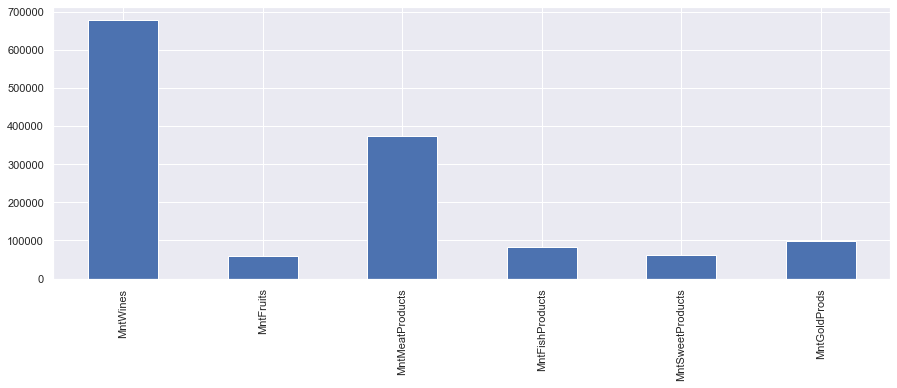

In [63]:
dataset[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().plot(kind='bar',figsize=(15,5))

Los productos mas gastados son el vino y la carne, veamos quienes son los clientes que mas gastan estos productos.

<AxesSubplot:xlabel='Marital_Status'>

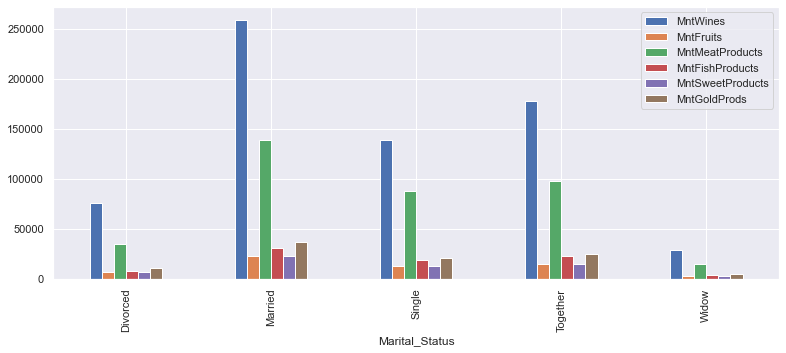

In [64]:
dataset.groupby('Marital_Status')['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'].sum().plot(kind='bar',figsize=(13,5))

<AxesSubplot:xlabel='Education'>

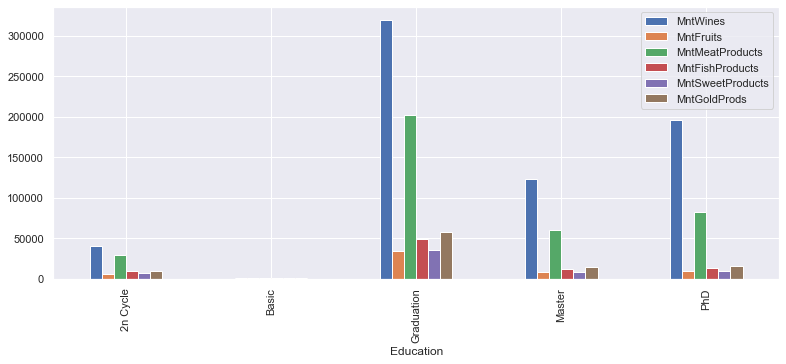

In [65]:
dataset.groupby('Education')['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'].sum().plot(kind='bar',figsize=(13,5))

el estado civil y el nivel academico de los clientes tienen el mismo comportamiento claro esta que con diferentes intensidades pero las graficas se parecen, los clientes que mas productos gastaron el los ultimos años son los clientes casados y los graduados.

# Continuo con el siguiente bloque que son las promociónes

In [66]:
dataset[(dataset['AcceptedCmp1']==1) & (dataset['AcceptedCmp2']== 1) &(dataset['AcceptedCmp3']==1) & (dataset['AcceptedCmp4']== 1) & (dataset['AcceptedCmp5']== 1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


1772 fueron los clientes que no aceptaron ninguna oferta de ninguna campaña

In [67]:
# tomo los datos de la primera campaña
AcceptedCmp1 = dataset[(dataset['AcceptedCmp1']==1)]
AcceptedCmp1.shape

(143, 27)

<AxesSubplot:xlabel='Marital_Status'>

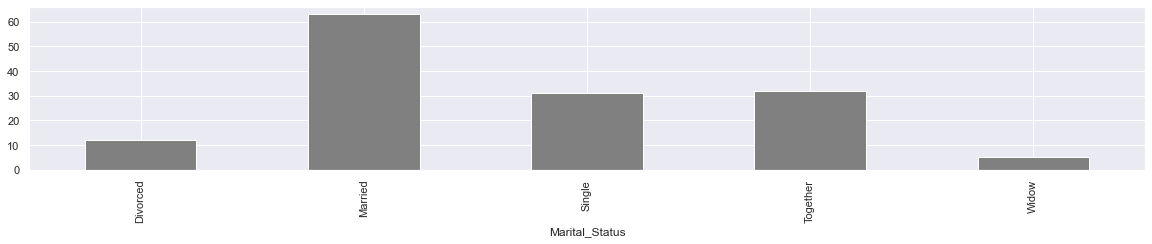

In [68]:
AcceptedCmp1.groupby('Marital_Status')['AcceptedCmp1'].count().plot(kind='bar',figsize=(20,3),color='gray')

<AxesSubplot:xlabel='Education'>

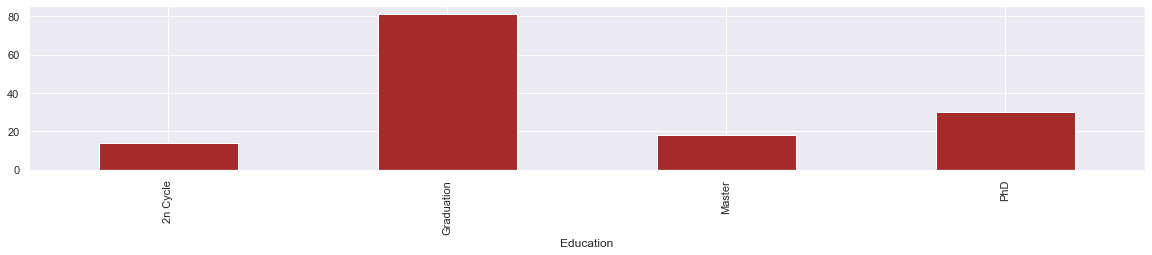

In [69]:
AcceptedCmp1.groupby('Education')['AcceptedCmp1'].count().plot(kind='bar',figsize=(20,3),color='brown')

de la primera campaña los clientes que mas aceptaron las ofertas fueron las personas casadas y las personas graduadas, estos clientes en la primera campaña tambien fueron los que mas realizaron compras con descuento en total fueron 143 clientes.

In [70]:
# ahora tomo los datos de la segunda campaña
AcceptedCmp2 = dataset[(dataset['AcceptedCmp2']==1)]
AcceptedCmp2.shape

(30, 27)

<AxesSubplot:xlabel='Marital_Status'>

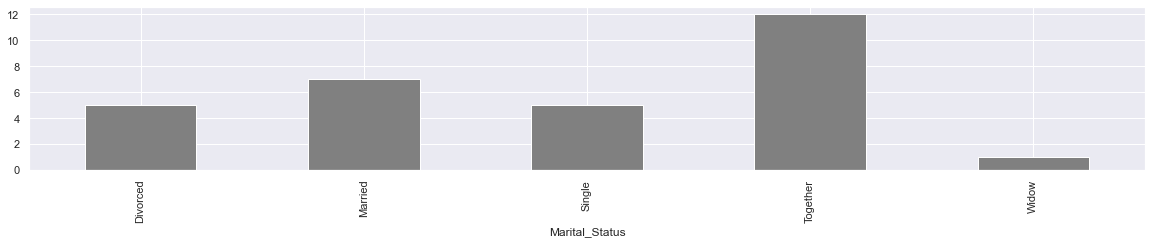

In [71]:
AcceptedCmp2.groupby('Marital_Status')['AcceptedCmp2'].count().plot(kind='bar',figsize=(20,3),color='gray')

<AxesSubplot:xlabel='Education'>

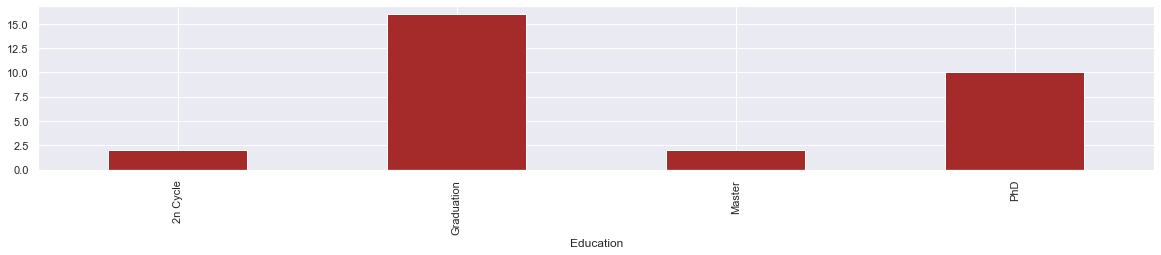

In [72]:
AcceptedCmp2.groupby('Education')['AcceptedCmp2'].count().plot(kind='bar',figsize=(20,3),color='brown')

con la segunda campaña es diferente, las personas que mas aceptaron ofertas fueron las personas juntas y las personas graduadas y con doctorado, en total fueron 30 personas que aceptaron ofertas y que realizaron compras con descuentos.

In [73]:
# ahora tomo los datos de la tercera campaña
AcceptedCmp3 = dataset[(dataset['AcceptedCmp3']==1)]
AcceptedCmp3.shape

(162, 27)

<AxesSubplot:xlabel='Marital_Status'>

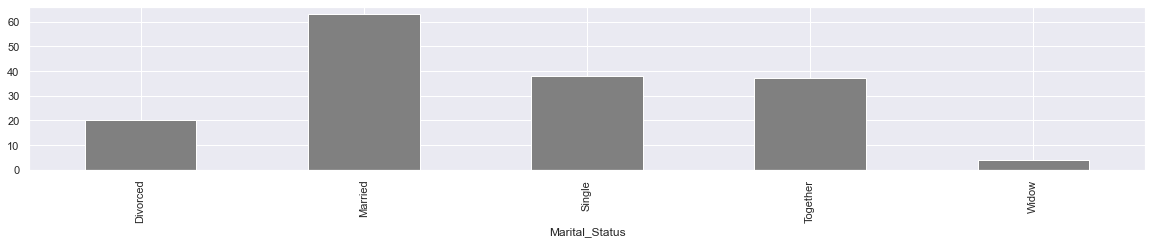

In [74]:
AcceptedCmp3.groupby('Marital_Status')['AcceptedCmp3'].count().plot(kind='bar',figsize=(20,3),color='gray')

<AxesSubplot:xlabel='Education'>

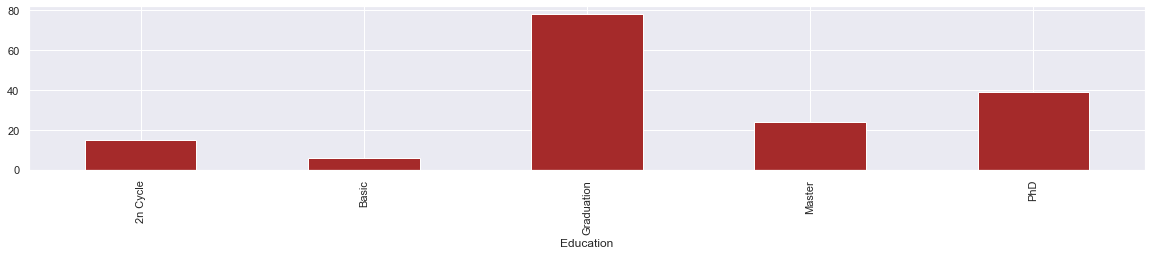

In [75]:
AcceptedCmp3.groupby('Education')['AcceptedCmp3'].count().plot(kind='bar',figsize=(20,3),color='brown')

en la tercera campaña los clientes que mas toman ofertas son los casados y los graduados

In [76]:
# ahora tomo los datos de la cuarta campaña
AcceptedCmp4 = dataset[(dataset['AcceptedCmp4']==1)]
AcceptedCmp4.shape

(167, 27)

<AxesSubplot:xlabel='Marital_Status'>

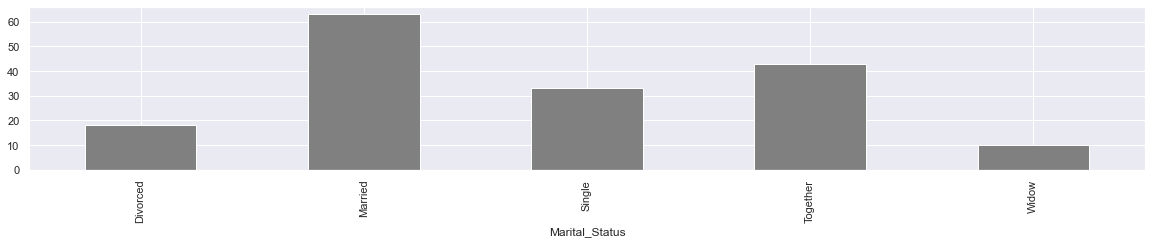

In [77]:
AcceptedCmp4.groupby('Marital_Status')['AcceptedCmp4'].count().plot(kind='bar',figsize=(20,3),color='gray')

<AxesSubplot:xlabel='Education'>

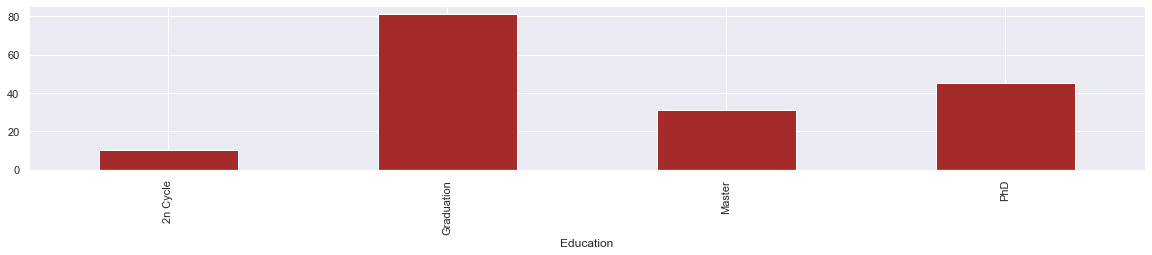

In [78]:
AcceptedCmp4.groupby('Education')['AcceptedCmp4'].count().plot(kind='bar',figsize=(20,3),color='brown')

en la cuarta casados y juntos con el nivel academico son los graduados y los que tienen doctorado.

In [79]:
# ahora tomo los datos de la quinta campaña
AcceptedCmp5 = dataset[(dataset['AcceptedCmp5']==1)]
AcceptedCmp5.shape

(162, 27)

<AxesSubplot:xlabel='Marital_Status'>

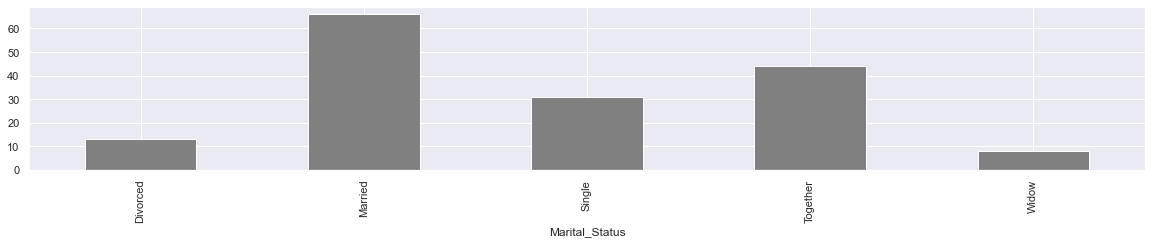

In [80]:
AcceptedCmp5.groupby('Marital_Status')['AcceptedCmp5'].count().plot(kind='bar',figsize=(20,3),color='gray')

<AxesSubplot:xlabel='Education'>

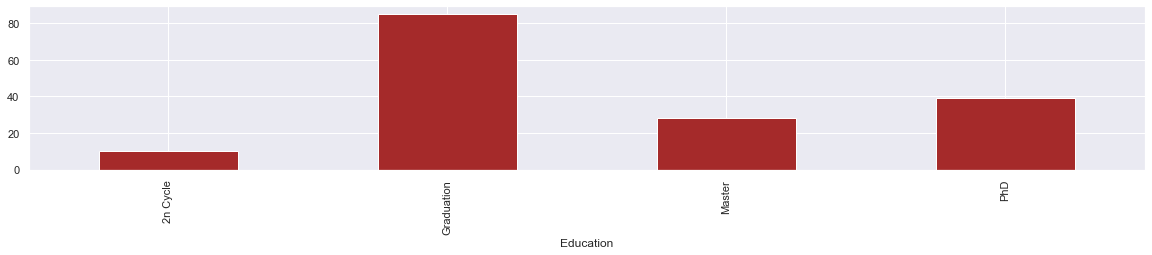

In [81]:
AcceptedCmp5.groupby('Education')['AcceptedCmp5'].count().plot(kind='bar',figsize=(20,3),color='brown')

igual que con las demas campañas

In [82]:
# y finalmente tomo los datos de la ultima campaña
Response = dataset[(dataset['Response']==1)]
Response.shape

(331, 27)

<AxesSubplot:xlabel='Marital_Status'>

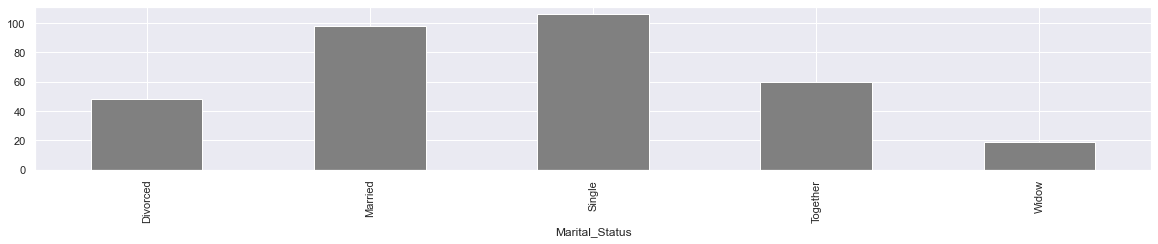

In [83]:
Response.groupby('Marital_Status')['Response'].count().plot(kind='bar',figsize=(20,3),color='gray')

<AxesSubplot:xlabel='Education'>

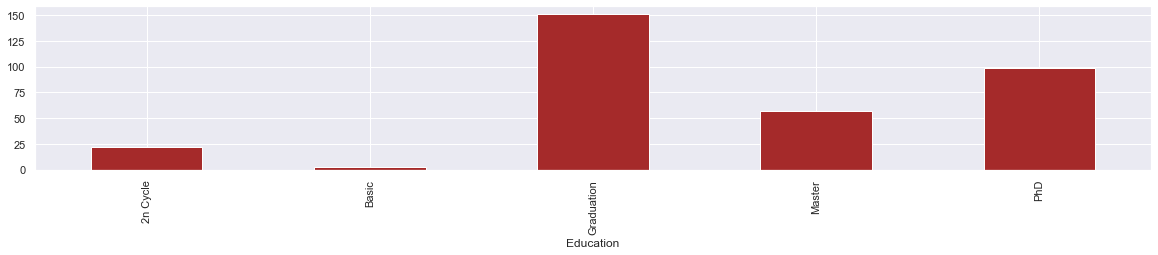

In [84]:
Response.groupby('Education')['Response'].count().plot(kind='bar',figsize=(20,3),color='brown')

en la ultima campaña si cambiaron los estados civiles de los clientes las personas que mas tomaron ofertas fueron los solteros y los casados y en el nivel academico no cambio mucho. pero aparecio un pequeño porcentaje de clientes con educación basica.

la ultima campaña fue la que mas tuvo exito.

In [85]:
# tomo los clientes que no tomaron ninguna oferta de ninguna de las campañas
dataset[(dataset['AcceptedCmp1']==0) & (dataset['AcceptedCmp2']== 0) &(dataset['AcceptedCmp3']==0) & (dataset['AcceptedCmp4']== 0) & (dataset['AcceptedCmp5']== 0) & (dataset['Response']== 0)].shape

(1627, 27)

en total fueron 1627 de los clientes que no aceptaron ninguna oferta de todas las campañas

In [86]:
2233 - 1627

606

en total de 2233 clientes del dataset solo 606 aceptaron ofertas o realizaron compras con descuento

# Continuo con el siguiente bloque que son las Shopping place

Voy a explorar los metodos de compra y los productos

In [87]:
# creo un dataset solamente con los productos
purchase_methods = dataset[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]

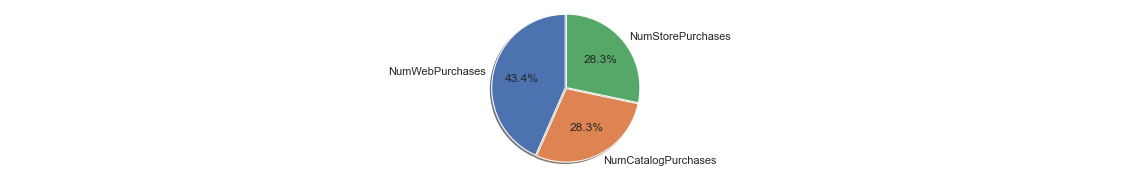

In [88]:
labels = purchase_methods.columns
sizes = [purchase_methods['NumWebPurchases'].sum(), purchase_methods['NumCatalogPurchases'].sum(), purchase_methods['NumCatalogPurchases'].sum()]
explode = (0.01, 0.01, 0.01)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

bueno en el diagrama de torta se ve que la mayoria de ventas se hacer mediante la pagina web, ahora quiero ver como se venden los productos.

In [89]:
# tomo a todos los clientes que gastaron vino
wine = dataset[(dataset['MntWines']>0)]

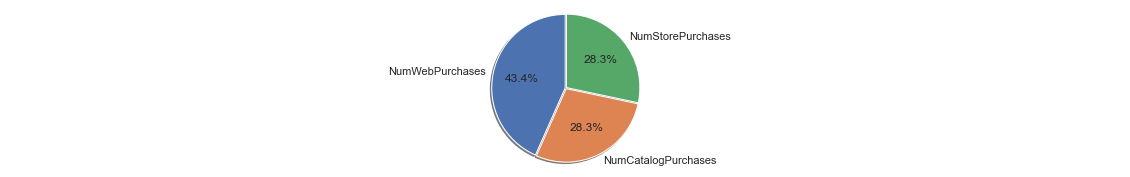

In [90]:
labels = purchase_methods.columns
sizes = [wine['NumWebPurchases'].sum(), wine['NumCatalogPurchases'].sum(), wine['NumCatalogPurchases'].sum()]
explode = (0.01, 0.01, 0.01)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [91]:
# tomo todos los clientes que gastaron frutas
fruits = dataset[(dataset['MntFruits']>0)]

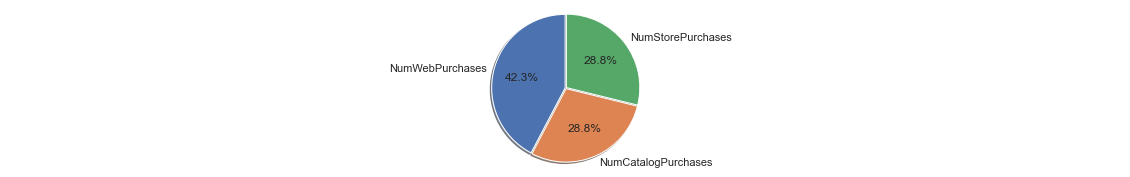

In [92]:
labels = purchase_methods.columns
sizes = [fruits['NumWebPurchases'].sum(), fruits['NumCatalogPurchases'].sum(), fruits['NumCatalogPurchases'].sum()]
explode = (0.01, 0.01, 0.01)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [93]:
# tomo todos los clientes que gastaron carne
meat = dataset[(dataset['MntMeatProducts']>0)]

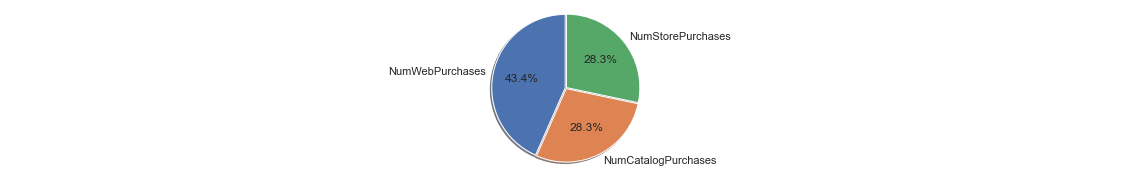

In [94]:
labels = purchase_methods.columns
sizes = [meat['NumWebPurchases'].sum(), meat['NumCatalogPurchases'].sum(), meat['NumCatalogPurchases'].sum()]
explode = (0.01, 0.01, 0.01)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [95]:
# tomo todos los clientes que gastaron pescado
fish = dataset[(dataset['MntFishProducts']>0)]

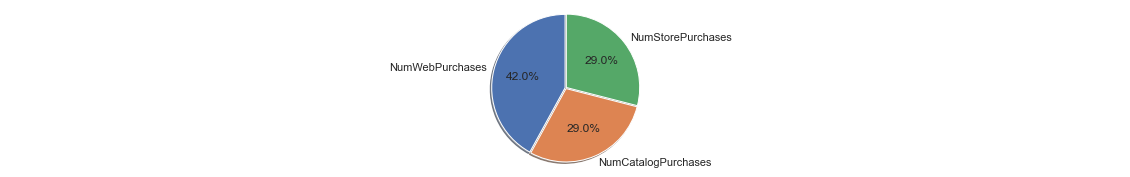

In [96]:
labels = purchase_methods.columns
sizes = [fish['NumWebPurchases'].sum(), fish['NumCatalogPurchases'].sum(), fish['NumCatalogPurchases'].sum()]
explode = (0.01, 0.01, 0.01)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [97]:
# tomo todos los clientes que gastaron dulces
sweets = dataset[(dataset['MntSweetProducts']>0)]

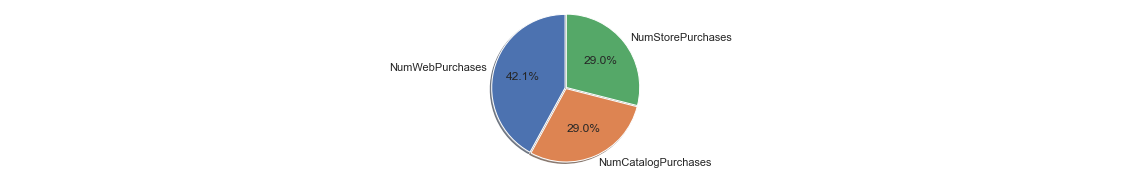

In [98]:
labels = purchase_methods.columns
sizes = [sweets['NumWebPurchases'].sum(), sweets['NumCatalogPurchases'].sum(), sweets['NumCatalogPurchases'].sum()]
explode = (0.01, 0.01, 0.01)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [99]:
# tomo todos los clientes que gastaron oro
gold = dataset[(dataset['MntGoldProds']>0)]

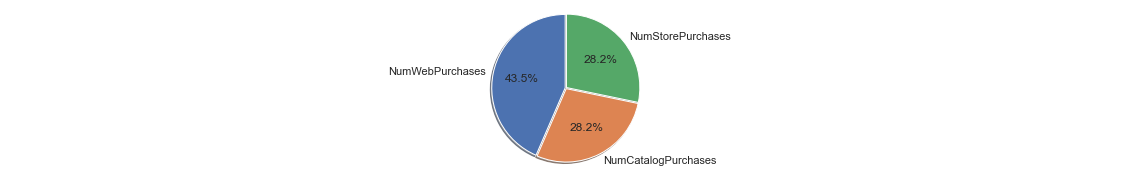

In [100]:
labels = purchase_methods.columns
sizes = [gold['NumWebPurchases'].sum(), gold['NumCatalogPurchases'].sum(), gold['NumCatalogPurchases'].sum()]
explode = (0.01, 0.01, 0.01)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

las ventas de todos los productos en los metodos de compra son muy similares en todos los productos la mayoria de clientes prefieren comprar por el sitio web.

In [101]:
dataset[['NumWebPurchases']].sum()

NumWebPurchases    9114
dtype: int64

In [102]:
dataset[['NumWebVisitsMonth']].sum()

NumWebVisitsMonth    11871
dtype: int64

In [103]:
# tomo los clientes que visitaron el sitio web almenos una vez
web_visits = dataset[(dataset['NumWebVisitsMonth']>=1)]

In [104]:
web_visits.shape

(2222, 27)

In [105]:
# tomo los clientes que compraron por el sitio web almenos una vez
shopping_website = web_visits[(web_visits['NumWebPurchases']>=1)]

In [106]:
shopping_website.shape

(2178, 27)

de los 2222 clientes que visitaron la pagina web almenos una sola vez 2178 compraron por la pagina web, la pagina web es el metodo de compra que los clientes usan.

ya tengo una idea de que tipo de clientes hay en la empresa, tambien los productos mas vendidos y que metodos de compra
los clientes utilizan mas.
por ultimo quiero clasificar los clientes por categoria: clientes frecuentes, clientes no tan frecuentes y clientes poco frecuentes.